# Data Preprocessing

## Content

<ol>
<li> Import Module </li>
<li> Dataset </li>
<li> Data Analysis </li>
<li> Feature Correlation </li>
<li> Data Cleaning
    <ul>
        <li>Duplicated Records</li>
        <li>Low Variance Variables</li>
        <li>Missing Values</li>
        <li>Outliers</li>
    </ul>
</li>
<li> Feature Encoding </li>
<li> Feature Scaling </li>
</ol>

## 1. Import module
<hr/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder

## 2. Dataset
<hr/>

In [2]:
data = {
    'Age': [31.0, 23.0, 28.0, 28.0, 27.0, 26.0, 26.0, 30.0, 24.0, 26.0, 200], 
    'Sex': ['M', 'M', 'M', 'F', 'M', None, 'F', 'F', 'M', 'F', 'M'],
    'Salary': [1000, 2500, 1200, 3000, 500, 250, None, 2400, 1500, 2500, 3000],
    'Num_Children': [2, 0, 0, 3, 2, 1, 4, 3, 0, 2, 2],
    'Num_Pet': [5, 1, 0, 5, 2, 2, 3, 2, 1, 0, 1],
    'Education': ['Bachelor', 'Phd', 'Master', None, 'Master', 'Bachelor', None, 'Master', 'Phd', 'Phd', 'Master'],
    'Country': ['US', 'France', 'England', 'Spain', 'Italy', 'France', 'France', 'US', 'France', 'Italy', 'US'],
    'Marital_Status': ['Single', None, 'Single', None, 'Single', 'Single', None, 'Single', None, None, 'Single']
}
df = pd.DataFrame(data)

df = df.fillna(np.nan)
df.head(9)

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country,Marital_Status
0,31.0,M,1000.0,2,5,Bachelor,US,Single
1,23.0,M,2500.0,0,1,Phd,France,NaN
2,28.0,M,1200.0,0,0,Master,England,Single
3,28.0,F,3000.0,3,5,NaN,Spain,NaN
4,27.0,M,500.0,2,2,Master,Italy,Single
5,26.0,NaN,250.0,1,2,Bachelor,France,Single
6,26.0,F,NaN,4,3,NaN,France,NaN
7,30.0,F,2400.0,3,2,Master,US,Single
8,24.0,M,1500.0,0,1,Phd,France,NaN


## 3. Data Analysis
<hr/>

In [3]:
# show summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             11 non-null     float64
 1   Sex             10 non-null     object 
 2   Salary          10 non-null     float64
 3   Num_Children    11 non-null     int64  
 4   Num_Pet         11 non-null     int64  
 5   Education       9 non-null      object 
 6   Country         11 non-null     object 
 7   Marital_Status  6 non-null      object 
dtypes: float64(2), int64(2), object(4)
memory usage: 832.0+ bytes


In [4]:
# show statistics information
df.describe()

,Age,Salary,Num_Children,Num_Pet
count,11.000000,10.000000,11.000000,11.000000
mean,42.636364,1785.000000,1.727273,2.000000
std,52.244182,1021.994238,1.348400,1.732051
min,23.000000,250.000000,0.000000,0.000000
25%,26.000000,1050.000000,0.500000,1.000000
50%,27.000000,1950.000000,2.000000,2.000000
75%,29.000000,2500.000000,2.500000,2.500000
max,200.000000,3000.000000,4.000000,5.000000


In [5]:
# show statistics information for categorical columns
df.select_dtypes(include=['object']).describe()

,Sex,Education,Country,Marital_Status
count,10,9,11,6
unique,2,3,5,1
top,M,Master,France,Single
freq,6,4,4,6


In [6]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=['int64', 'float64'])

<Axes: ylabel='Frequency'>

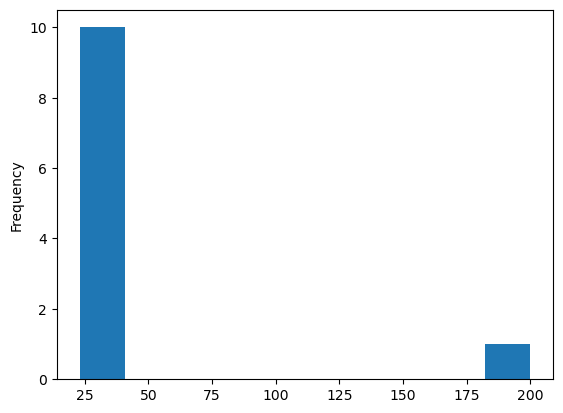

In [7]:
# plot histgrame for 'Age'
df['Age'].plot.hist()
# df['Age'].plot.hist(bins=(range(0,250,10)))

<Axes: >

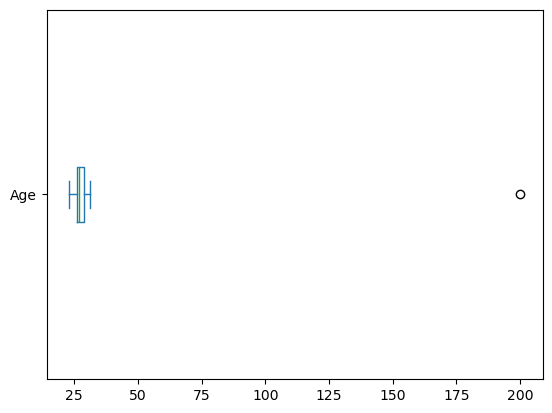

In [8]:
# plot boxplot for 'Age'
df['Age'].plot.box(vert=False)

<Axes: xlabel='Sex'>

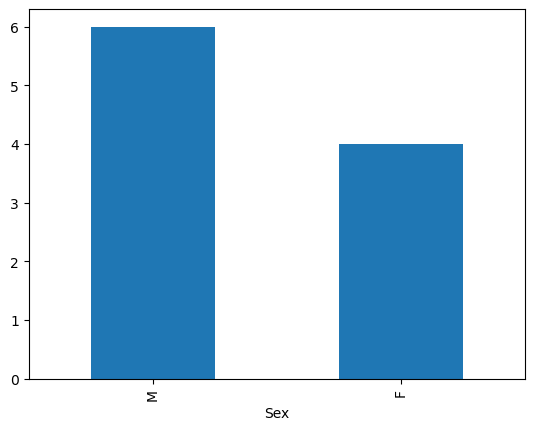

In [9]:
# plot bar chart for 'Sex'
df['Sex'].value_counts().plot.bar()

<Axes: ylabel='count'>

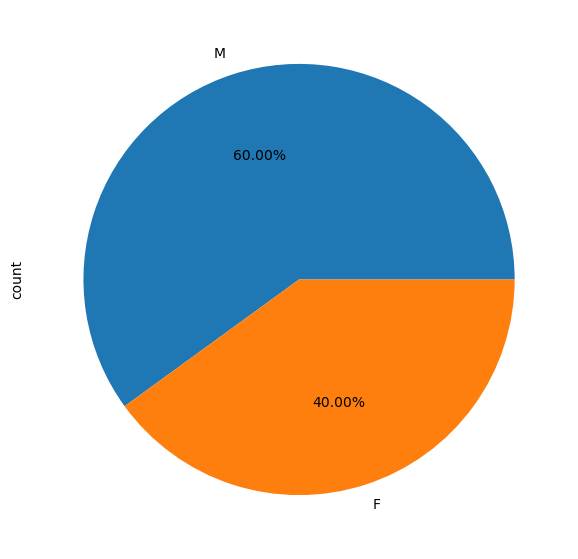

In [10]:
# plot pie chart for 'Sex'
df['Sex'].value_counts().plot.pie(autopct='%.2f%%', figsize=(9, 7))

<Axes: >

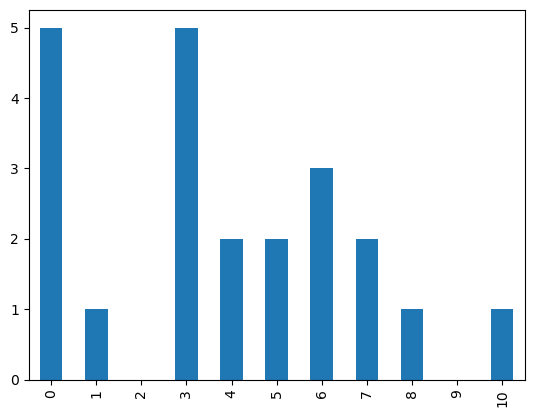

In [11]:
# plot bar chart for 'Num_Pet'
df['Num_Pet'].plot.bar()

<Axes: >

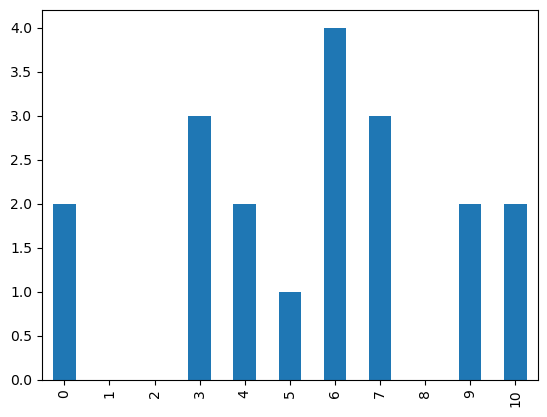

In [12]:
# plot bar chart for 'Num_Children'
df['Num_Children'].plot.bar()

<Axes: xlabel='Education'>

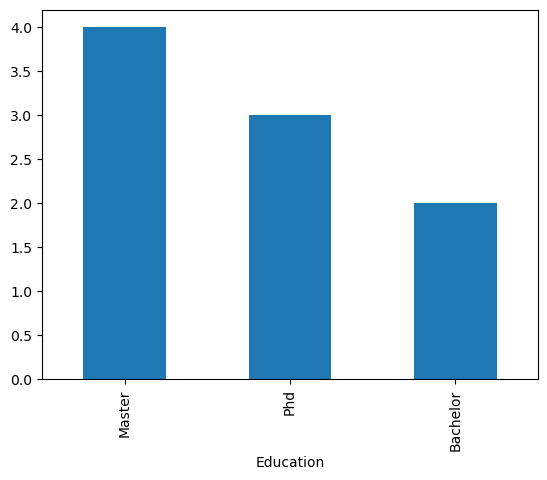

In [13]:
# plot bar chart for 'Education'
df['Education'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

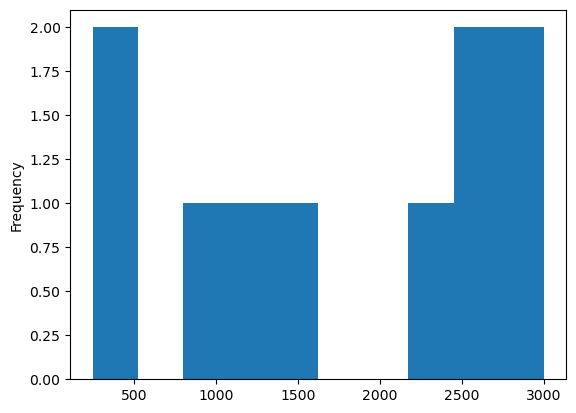

In [14]:
# plot histogram for 'Salary'
df['Salary'].plot.hist()

<Axes: >

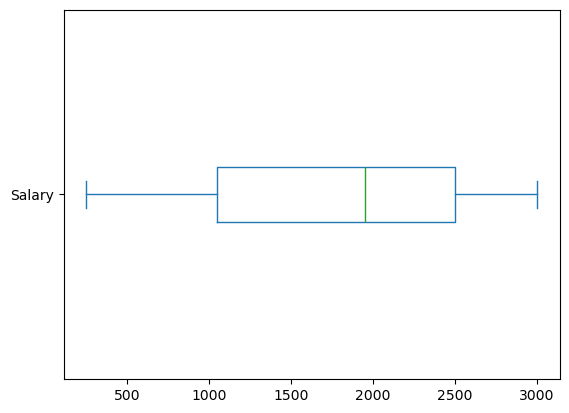

In [15]:
# plot boxplot for 'Salary'
df['Salary'].plot.box(vert=False)

## 4. Feature Correlation
<hr/>

In [16]:
df.head()

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country,Marital_Status
0,31.0,M,1000.0,2,5,Bachelor,US,Single
1,23.0,M,2500.0,0,1,Phd,France,NaN
2,28.0,M,1200.0,0,0,Master,England,Single
3,28.0,F,3000.0,3,5,NaN,Spain,NaN
4,27.0,M,500.0,2,2,Master,Italy,Single


In [17]:
# compute correlation coefficent between fields while ignoring the categorical columns
pearson_corr = df.corr(method='pearson', numeric_only=True)

pearson_corr

,Age,Salary,Num_Children,Num_Pet
Age,1.000000,0.413629,0.087882,-0.167975
Salary,0.413629,1.000000,0.339026,-0.037313
Num_Children,0.087882,0.339026,1.000000,0.556627
Num_Pet,-0.167975,-0.037313,0.556627,1.000000


<Axes: >

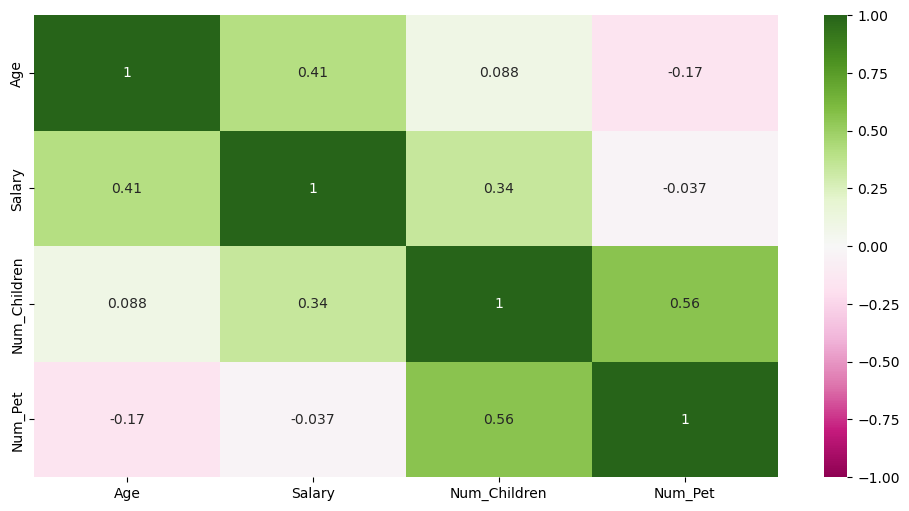

In [18]:
# plot correlation coefficent using heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)

## 5. Data Cleaning
<hr/>

### Duplicated Records

In [19]:
# select duplicated rows
df[df.duplicated()]

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country,Marital_Status


In [20]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

df

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country,Marital_Status
0,31.0,M,1000.0,2,5,Bachelor,US,Single
1,23.0,M,2500.0,0,1,Phd,France,NaN
2,28.0,M,1200.0,0,0,Master,England,Single
3,28.0,F,3000.0,3,5,NaN,Spain,NaN
4,27.0,M,500.0,2,2,Master,Italy,Single
5,26.0,NaN,250.0,1,2,Bachelor,France,Single
6,26.0,F,NaN,4,3,NaN,France,NaN
7,30.0,F,2400.0,3,2,Master,US,Single
8,24.0,M,1500.0,0,1,Phd,France,NaN
9,26.0,F,2500.0,2,0,Phd,Italy,NaN


### Low Variance Variables

In [21]:
# remove categorical column having only one value
cat_threshold = 1
df.drop([col for col in df.columns.values 
               if not is_numeric_dtype(df[col]) and df[col].nunique() == cat_threshold],
              axis=1, inplace=True)

df

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,M,1000.0,2,5,Bachelor,US
1,23.0,M,2500.0,0,1,Phd,France
2,28.0,M,1200.0,0,0,Master,England
3,28.0,F,3000.0,3,5,NaN,Spain
4,27.0,M,500.0,2,2,Master,Italy
5,26.0,NaN,250.0,1,2,Bachelor,France
6,26.0,F,NaN,4,3,NaN,France
7,30.0,F,2400.0,3,2,Master,US
8,24.0,M,1500.0,0,1,Phd,France
9,26.0,F,2500.0,2,0,Phd,Italy


### Missing Values (NaN)

In [22]:
# count missing values for each column
df.isnull().sum()

Age             0
Sex             1
Salary          1
Num_Children    0
Num_Pet         0
Education       2
Country         0
dtype: int64

<Axes: >

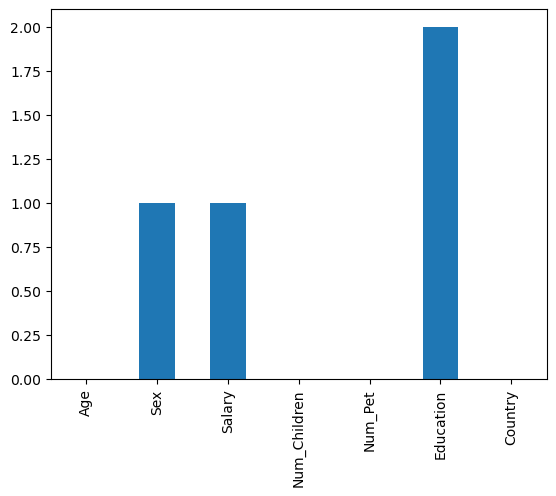

In [23]:
# visualize missing values for each column
df.isnull().sum().plot.bar()

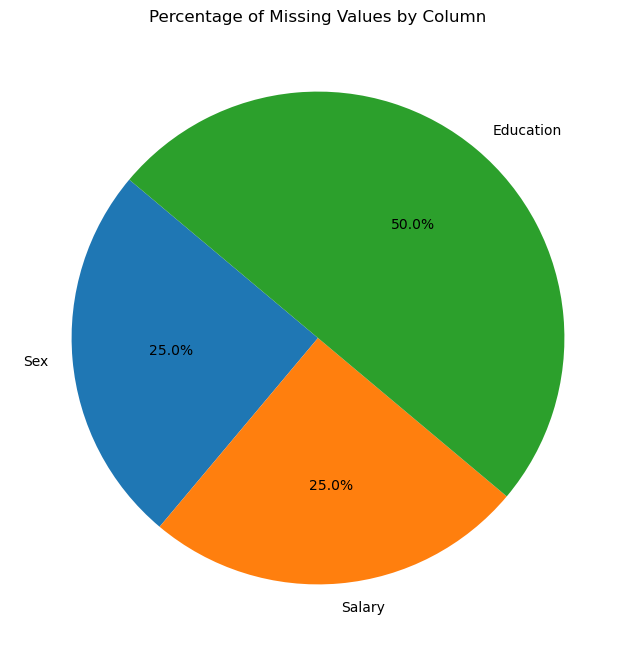

In [24]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values
missing_cols = missing_percentage[missing_percentage > 0]

# Plot a pie chart with percentages for columns with missing values
plt.figure(figsize=(8, 8))
plt.pie(missing_cols, labels=missing_cols.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values by Column')
plt.show()

#### **First Option**: Remove NaN Records(Rows)

In [25]:
# drop rows containing NaN values
df.dropna()
# set inplace=True to apply to df

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,M,1000.0,2,5,Bachelor,US
1,23.0,M,2500.0,0,1,Phd,France
2,28.0,M,1200.0,0,0,Master,England
4,27.0,M,500.0,2,2,Master,Italy
7,30.0,F,2400.0,3,2,Master,US
8,24.0,M,1500.0,0,1,Phd,France
9,26.0,F,2500.0,2,0,Phd,Italy
10,200.0,M,3000.0,2,1,Master,US


#### **Second Option**: Remove NaN features/columns ⚠️ **Not Recommended**

In [26]:
df.dropna(axis=1)
# set inplace=True to apply to df

,Age,Num_Children,Num_Pet,Country
0,31.0,2,5,US
1,23.0,0,1,France
2,28.0,0,0,England
3,28.0,3,5,Spain
4,27.0,2,2,Italy
5,26.0,1,2,France
6,26.0,4,3,France
7,30.0,3,2,US
8,24.0,0,1,France
9,26.0,2,0,Italy


#### **Third Option**: Apply Imputation

##### Fillna

In [27]:
for col in df.columns.values:
    # numerial column
    if is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        # categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)    
df

/var/folders/8t/z5th2z1n6yl2yj7hqd2lt6qh0000gn/T/ipykernel_56084/1482933392.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
/var/folders/8t/z5th2z1n6yl2yj7hqd2lt6qh0000gn/T/ipykernel_56084/1482933392.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,M,1000.0,2,5,Bachelor,US
1,23.0,M,2500.0,0,1,Phd,France
2,28.0,M,1200.0,0,0,Master,England
3,28.0,F,3000.0,3,5,Master,Spain
4,27.0,M,500.0,2,2,Master,Italy
5,26.0,M,250.0,1,2,Bachelor,France
6,26.0,F,1785.0,4,3,Master,France
7,30.0,F,2400.0,3,2,Master,US
8,24.0,M,1500.0,0,1,Phd,France
9,26.0,F,2500.0,2,0,Phd,Italy


##### Imputation

In [28]:
df_copy = df.copy()

In [29]:
numerical = df.select_dtypes(include=['number']) 
categorical = df.select_dtypes(include=['object'])

In [30]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with median
numeric_imputer = SimpleImputer(strategy="median")
df_copy[numerical.columns] = numeric_imputer.fit_transform(numerical)

# Impute missing values in categorical columns with most frequent category
categorical_imputer = SimpleImputer(strategy="most_frequent")
df_copy[categorical.columns] = categorical_imputer.fit_transform(categorical)

# Check the DataFrame after imputation
print(df_copy)

      Age Sex  Salary  Num_Children  Num_Pet Education  Country
0    31.0   M  1000.0           2.0      5.0  Bachelor       US
1    23.0   M  2500.0           0.0      1.0       Phd   France
2    28.0   M  1200.0           0.0      0.0    Master  England
3    28.0   F  3000.0           3.0      5.0    Master    Spain
4    27.0   M   500.0           2.0      2.0    Master    Italy
5    26.0   M   250.0           1.0      2.0  Bachelor   France
6    26.0   F  1785.0           4.0      3.0    Master   France
7    30.0   F  2400.0           3.0      2.0    Master       US
8    24.0   M  1500.0           0.0      1.0       Phd   France
9    26.0   F  2500.0           2.0      0.0       Phd    Italy
10  200.0   M  3000.0           2.0      1.0    Master       US


In [31]:
df = df_copy
df

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,M,1000.0,2.0,5.0,Bachelor,US
1,23.0,M,2500.0,0.0,1.0,Phd,France
2,28.0,M,1200.0,0.0,0.0,Master,England
3,28.0,F,3000.0,3.0,5.0,Master,Spain
4,27.0,M,500.0,2.0,2.0,Master,Italy
5,26.0,M,250.0,1.0,2.0,Bachelor,France
6,26.0,F,1785.0,4.0,3.0,Master,France
7,30.0,F,2400.0,3.0,2.0,Master,US
8,24.0,M,1500.0,0.0,1.0,Phd,France
9,26.0,F,2500.0,2.0,0.0,Phd,Italy


### Outliers

<Axes: >

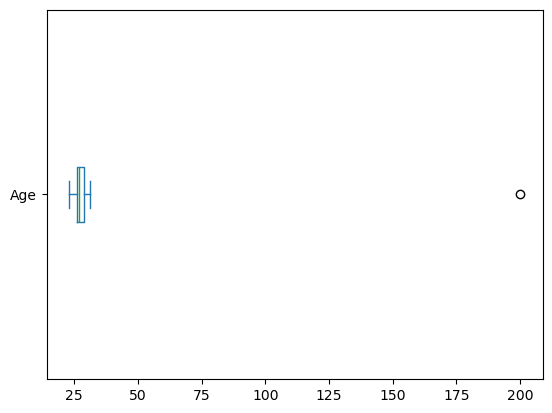

In [32]:
df['Age'].plot.box(vert=False)

In [33]:
# remove outliers by interquartile range (IQR)
def remove_outliers_with_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    return df[~outlier]

# remove outliers by z-score - mostly used with normal distribution
def remove_outliers_with_zscore(df):
    cols = df.select_dtypes(include=np.number).columns.tolist()
    std = df[cols].std()
    mean = df[cols].mean()
    zscore = abs((df[cols] - mean) / std)

    outlier = (zscore > 3).any(axis=1)

    return df[~outlier].copy()

df = remove_outliers_with_zscore(df)

<Axes: >

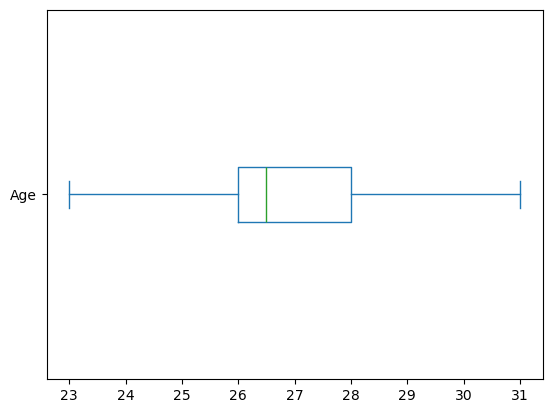

In [34]:
df['Age'].plot.box(vert=False)

## 6. Feature Encoding
<hr/>

In [35]:
# count unique values of categorical columns
categorical = df.select_dtypes(include=['object'])
for col in categorical:
    print(f"{df[col].unique()}")

['M' 'F']
['Bachelor' 'Phd' 'Master']
['US' 'France' 'England' 'Spain' 'Italy']


### Sklearn

#### One Hot Encoder

In [36]:
from sklearn.preprocessing import OneHotEncoder

categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['number'])

categorical_1h = OneHotEncoder(drop="first")
df_ = categorical_1h.fit_transform(categorical)

In [37]:
df_.toarray()

array([[1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.]])

In [38]:
df_1h = pd.DataFrame(df_.toarray(), columns=categorical_1h.get_feature_names_out(),index=categorical.index)
df_1h

,Sex_M,Education_Master,Education_Phd,Country_France,Country_Italy,Country_Spain,Country_US
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
# You should wait until the numerical value has been scaled before combining them back
df_ = pd.concat([df_1h, numerical], axis=1)
df_

,Sex_M,Education_Master,Education_Phd,Country_France,Country_Italy,Country_Spain,Country_US,Age,Salary,Num_Children,Num_Pet
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,1000.0,2.0,5.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,23.0,2500.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,1200.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,3000.0,3.0,5.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,27.0,500.0,2.0,2.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,250.0,1.0,2.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26.0,1785.0,4.0,3.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,2400.0,3.0,2.0
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,24.0,1500.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,26.0,2500.0,2.0,0.0


#### Ordinal Encoder

In [40]:
from sklearn.preprocessing import OrdinalEncoder
categorical_oe = OrdinalEncoder()
df_ = categorical_oe.fit_transform(categorical)
df_

array([[1., 0., 4.],
       [1., 2., 1.],
       [1., 1., 0.],
       [0., 1., 3.],
       [1., 1., 2.],
       [1., 0., 1.],
       [0., 1., 1.],
       [0., 1., 4.],
       [1., 2., 1.],
       [0., 2., 2.]])

In [41]:
categorical_oe.categories_

[array(['F', 'M'], dtype=object),
 array(['Bachelor', 'Master', 'Phd'], dtype=object),
 array(['England', 'France', 'Italy', 'Spain', 'US'], dtype=object)]

In [42]:
df_oe = pd.DataFrame(df_, columns=categorical_oe.get_feature_names_out(),index=categorical.index)
df_oe

,Sex,Education,Country
0,1.0,0.0,4.0
1,1.0,2.0,1.0
2,1.0,1.0,0.0
3,0.0,1.0,3.0
4,1.0,1.0,2.0
5,1.0,0.0,1.0
6,0.0,1.0,1.0
7,0.0,1.0,4.0
8,1.0,2.0,1.0
9,0.0,2.0,2.0


In [43]:
# You should wait until the numerical value has been scaled before combining them back
df_ = pd.concat([df_oe, numerical], axis=1)
df_

,Sex,Education,Country,Age,Salary,Num_Children,Num_Pet
0,1.0,0.0,4.0,31.0,1000.0,2.0,5.0
1,1.0,2.0,1.0,23.0,2500.0,0.0,1.0
2,1.0,1.0,0.0,28.0,1200.0,0.0,0.0
3,0.0,1.0,3.0,28.0,3000.0,3.0,5.0
4,1.0,1.0,2.0,27.0,500.0,2.0,2.0
5,1.0,0.0,1.0,26.0,250.0,1.0,2.0
6,0.0,1.0,1.0,26.0,1785.0,4.0,3.0
7,0.0,1.0,4.0,30.0,2400.0,3.0,2.0
8,1.0,2.0,1.0,24.0,1500.0,0.0,1.0
9,0.0,2.0,2.0,26.0,2500.0,2.0,0.0


### Categorical Encoder Library

#### Ordinal Encoder

In [44]:
ordinal_encoder = ce.OrdinalEncoder(cols=['Sex', 'Education', 'Country'], 
                                    mapping=[
                                        {'col': 'Sex', 'mapping': {'M': 0, 'F': 1}},
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}},
                                        {'col': 'Country', 'mapping': {'US': 0, 'France': 1, 'England': 2, 'Spain':3, 'Italy':4 }}
                                    ])
df_ = ordinal_encoder.fit_transform(df)

In [45]:
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,0,1000.0,2.0,5.0,0,0
1,23.0,0,2500.0,0.0,1.0,2,1
2,28.0,0,1200.0,0.0,0.0,1,2
3,28.0,1,3000.0,3.0,5.0,1,3
4,27.0,0,500.0,2.0,2.0,1,4
5,26.0,0,250.0,1.0,2.0,0,1
6,26.0,1,1785.0,4.0,3.0,1,1
7,30.0,1,2400.0,3.0,2.0,1,0
8,24.0,0,1500.0,0.0,1.0,2,1
9,26.0,1,2500.0,2.0,0.0,2,4


#### OneHot Encoder

In [46]:
onehot_encoder = ce.OneHotEncoder(categorical)
df_ = onehot_encoder.fit_transform(df)
# select the categorical columns and drop one element of each one hot encoded column
column_to_drop = [col+"_1" for col in categorical.columns]

# set inplace=True for the dataframe to take effect
df_.drop(column_to_drop,axis=1)

,Age,Sex_2,Salary,Num_Children,Num_Pet,Education_2,Education_3,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,1,0,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,0,1,0,0,0
6,26.0,1,1785.0,4.0,3.0,0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,1,0,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,1,0,0,0,0,1


#### Label Encode + One Hot Encode

In [47]:
ordinal_encoder = ce.OrdinalEncoder(cols=['Sex', 'Education'], 
                                    mapping=[
                                        {'col': 'Sex', 'mapping': {'M': 0, 'F': 1}},
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}}
                                    ])
df_ = ordinal_encoder.fit_transform(df)

onehot_encoder = ce.OneHotEncoder(cols=['Country'])
df_ = onehot_encoder.fit_transform(df_)
df_.drop('Country_1', axis=1, inplace=True)
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,2,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,1,0,0,0
6,26.0,1,1785.0,4.0,3.0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,2,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,2,0,0,0,1


### ⚠️ Pandas - Not recommended

In [48]:
df = pd.get_dummies(df, drop_first=True, columns=['Sex', 'Country'])

# for ordinal encoding use scikit-learn since pandas have no this feature
ordinal_encoder = ce.OrdinalEncoder(cols=['Education'], 
                                    mapping=[
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}}
                                    ])

df = ordinal_encoder.fit_transform(df)

df

,Age,Salary,Num_Children,Num_Pet,Education,Sex_M,Country_France,Country_Italy,Country_Spain,Country_US
0,31.0,1000.0,2.0,5.0,0,True,False,False,False,True
1,23.0,2500.0,0.0,1.0,2,True,True,False,False,False
2,28.0,1200.0,0.0,0.0,1,True,False,False,False,False
3,28.0,3000.0,3.0,5.0,1,False,False,False,True,False
4,27.0,500.0,2.0,2.0,1,True,False,True,False,False
5,26.0,250.0,1.0,2.0,0,True,True,False,False,False
6,26.0,1785.0,4.0,3.0,1,False,True,False,False,False
7,30.0,2400.0,3.0,2.0,1,False,False,False,False,True
8,24.0,1500.0,0.0,1.0,2,True,True,False,False,False
9,26.0,2500.0,2.0,0.0,2,False,False,True,False,False


## 7. Feature Scaling
<hr/>

Suppose that we applied the label encoder to the "Sex" and "Educatioin" columns, and one hot encoder to the "Country" column.

In [49]:
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,2,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,1,0,0,0
6,26.0,1,1785.0,4.0,3.0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,2,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,2,0,0,0,1


**⚠️ You shoudn't scale the target or label value, because we don't want the machine to learn to predict a scale value.**

In [50]:
df_label = df_['Salary']
df_label

0    1000.0
1    2500.0
2    1200.0
3    3000.0
4     500.0
5     250.0
6    1785.0
7    2400.0
8    1500.0
9    2500.0
Name: Salary, dtype: float64

In [51]:
df_input = df_.drop(['Salary'],axis=1)
df_input

,Age,Sex,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,2.0,5.0,0,0,0,0,0
1,23.0,0,0.0,1.0,2,1,0,0,0
2,28.0,0,0.0,0.0,1,0,1,0,0
3,28.0,1,3.0,5.0,1,0,0,1,0
4,27.0,0,2.0,2.0,1,0,0,0,1
5,26.0,0,1.0,2.0,0,1,0,0,0
6,26.0,1,4.0,3.0,1,1,0,0,0
7,30.0,1,3.0,2.0,1,0,0,0,0
8,24.0,0,0.0,1.0,2,1,0,0,0
9,26.0,1,2.0,0.0,2,0,0,0,1


### Standardization

In [52]:
std_scaler = StandardScaler()
# Category to ignore
categorical = ['Country_2','Country_3', 'Country_4','Country_5', 'Education','Sex']
# Dataframe of the categorical data
df_cat = df_input[categorical]

# Scaling on the numerical data
scaled_data = std_scaler.fit_transform(df_input.drop(columns=categorical))

# Create column header for Dataframe
columns_header = ['Age','Num_Children','Num_Pet']
# Convert it back to Pandas Dataframe
scaled_data = pd.DataFrame(data=scaled_data, columns=columns_header, index=df_.index)

# Combine the scaled data with the categorical data
df_input_std = pd.concat([scaled_data, df_cat], axis=1)
df_input_std

,Age,Num_Children,Num_Pet,Country_2,Country_3,Country_4,Country_5,Education,Sex
0,1.749837,0.222988,1.705882,0,0,0,0,0,0
1,-1.664479,-1.263600,-0.647059,1,0,0,0,2,0
2,0.469469,-1.263600,-1.235294,0,1,0,0,1,0
3,0.469469,0.966282,1.705882,0,0,1,0,1,1
4,0.042679,0.222988,-0.058824,0,0,0,1,1,0
5,-0.384111,-0.520306,-0.058824,1,0,0,0,0,0
6,-0.384111,1.709577,0.529412,1,0,0,0,1,1
7,1.323048,0.966282,-0.058824,0,0,0,0,1,1
8,-1.237690,-1.263600,-0.647059,1,0,0,0,2,0
9,-0.384111,0.222988,-1.235294,0,0,0,1,2,1


### Min-max normalization

In [53]:
min_max_scaler = MinMaxScaler()
# Category to ignore
categorical = ['Country_2','Country_3', 'Country_4','Country_5', 'Education','Sex']
# Dataframe of the categorical data
df_cat = df_input[categorical]

# Scaling on the numerical data
scaled_data = min_max_scaler.fit_transform(df_input.drop(columns=categorical))
scaled_data 

# Create column header for Dataframe
columns_header = ['Age','Num_Children','Num_Pet']

# Convert it back to Pandas Dataframe
scaled_data = pd.DataFrame(data=scaled_data, columns=columns_header, index=df_.index)

# Combine the scaled data with the categorical data
df_input_minmax = pd.concat([scaled_data, df_cat], axis=1)
df_input_minmax

,Age,Num_Children,Num_Pet,Country_2,Country_3,Country_4,Country_5,Education,Sex
0,1.000,0.50,1.0,0,0,0,0,0,0
1,0.000,0.00,0.2,1,0,0,0,2,0
2,0.625,0.00,0.0,0,1,0,0,1,0
3,0.625,0.75,1.0,0,0,1,0,1,1
4,0.500,0.50,0.4,0,0,0,1,1,0
5,0.375,0.25,0.4,1,0,0,0,0,0
6,0.375,1.00,0.6,1,0,0,0,1,1
7,0.875,0.75,0.4,0,0,0,0,1,1
8,0.125,0.00,0.2,1,0,0,0,2,0
9,0.375,0.50,0.0,0,0,0,1,2,1
